CHECK GPUs

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


TRYING KERAS

In [2]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [5]:
max([max(sequence) for sequence in train_data])

9999

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[10]])

In [7]:
print('Index:' + str(word_index['you']) + '\n' +
'Word: ' + reverse_word_index[22])

Index:22
Word: you


In [8]:
decoded_review

"? french horror cinema has seen something of a revival over the last couple of years with great films such as inside and ? romance ? on to the scene ? ? the revival just slightly but stands head and shoulders over most modern horror titles and is surely one of the best french horror films ever made ? was obviously shot on a low budget but this is made up for in far more ways than one by the originality of the film and this in turn is ? by the excellent writing and acting that ensure the film is a winner the plot focuses on two main ideas prison and black magic the central character is a man named ? sent to prison for fraud he is put in a cell with three others the quietly insane ? body building ? marcus and his retarded boyfriend daisy after a short while in the cell together they stumble upon a hiding place in the wall that contains an old ? after ? part of it they soon realise its magical powers and realise they may be able to use it to break through the prison walls br br black mag

In [9]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [11]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [12]:
%time
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [14]:
model_json = model.to_json()

In [15]:
%store model_json

Stored 'model_json' (str)


In [18]:
from keras.models import model_from_json

model1 = model_from_json(model_json)

In [19]:
model1

In [20]:
model

In [21]:
model

In [22]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [23]:
model1.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [24]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [25]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [26]:
%time
model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc'])
history = model.fit(partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val))

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 14.8 µs
Epoch 1/20
30/30 [==============================] - 2s 56ms/step - loss: 0.5074 - acc: 0.8143 - val_loss: 0.3941 - val_acc: 0.8716
Epoch 2/20
30/30 [==============================] - 1s 40ms/step - loss: 0.3114 - acc: 0.9024 - val_loss: 0.3056 - val_acc: 0.8908
Epoch 3/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2273 - acc: 0.9263 - val_loss: 0.2982 - val_acc: 0.8817
Epoch 4/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1798 - acc: 0.9402 - val_loss: 0.2803 - val_acc: 0.8877
Epoch 5/20
30/30 [==============================] - 1s 49ms/step - loss: 0.1477 - acc: 0.9521 - val_loss: 0.2863 - val_acc: 0.8835
Epoch 6/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1215 - acc: 0.9629 - val_loss: 0.3019 - val_acc: 0.8840
Epoch 7/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1019 - acc: 0.9691 - val_loss: 0.3052 - val_acc: 0.8841
Epoch 8/20
30/30 [=

In [27]:
history_dict = history.history

In [28]:
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [29]:
history_dict['loss']

[0.507388710975647,
 0.3114309012889862,
 0.22725968062877655,
 0.1798059046268463,
 0.14772814512252808,
 0.12154563516378403,
 0.10191794484853745,
 0.08571851253509521,
 0.0684610903263092,
 0.05869603529572487,
 0.045638397336006165,
 0.04062031954526901,
 0.029698649421334267,
 0.02587774209678173,
 0.02074485830962658,
 0.017427334561944008,
 0.011508666910231113,
 0.010393871925771236,
 0.007953597232699394,
 0.004796254448592663]

In [30]:
history_dict['acc']

[0.8142666816711426,
 0.902400016784668,
 0.9263333082199097,
 0.9401999711990356,
 0.9520666599273682,
 0.9628666639328003,
 0.9691333174705505,
 0.9751999974250793,
 0.9811333417892456,
 0.9841333627700806,
 0.9888666868209839,
 0.9908000230789185,
 0.9940666556358337,
 0.9950666427612305,
 0.9957333207130432,
 0.9968000054359436,
 0.9989333152770996,
 0.9992666840553284,
 0.9994666576385498,
 0.9998000264167786]

In [31]:
history_dict['val_acc']

[0.8715999722480774,
 0.8907999992370605,
 0.8816999793052673,
 0.8877000212669373,
 0.8834999799728394,
 0.8840000033378601,
 0.8841000199317932,
 0.8784999847412109,
 0.8813999891281128,
 0.8792999982833862,
 0.8774999976158142,
 0.8650000095367432,
 0.8730000257492065,
 0.8730000257492065,
 0.871399998664856,
 0.8689000010490417,
 0.8673999905586243,
 0.8677999973297119,
 0.8657000064849854,
 0.862500011920929]

In [33]:
history_dict['val_loss']

[0.39406606554985046,
 0.3056005537509918,
 0.29816585779190063,
 0.28027263283729553,
 0.2863292098045349,
 0.301932156085968,
 0.30518677830696106,
 0.34512048959732056,
 0.348164439201355,
 0.3703230619430542,
 0.40124326944351196,
 0.459956556558609,
 0.4581405222415924,
 0.48581308126449585,
 0.516986072063446,
 0.5533846616744995,
 0.5905640721321106,
 0.6146909594535828,
 0.6589166522026062,
 0.7195543646812439]

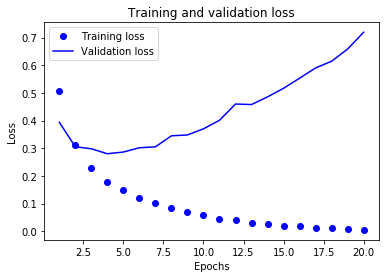

In [35]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

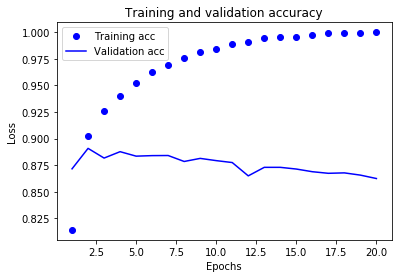

In [37]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, history_dict['acc'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_acc'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

OVERFITTING, LET'S TRAIN WITH 3 EPOCHS ITERATIONS

In [38]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 20ms/step - loss: 0.4561 - accuracy: 0.8134
Epoch 2/4
49/49 [==============================] - 1s 20ms/step - loss: 0.2611 - accuracy: 0.9105
Epoch 3/4
49/49 [==============================] - 1s 20ms/step - loss: 0.2011 - accuracy: 0.9279
Epoch 4/4
782/782 [==============================] - 3s 4ms/step - loss: 0.3016 - accuracy: 0.8806


In [39]:
results

[0.3016408085823059, 0.8805599808692932]

In [40]:
model.predict(x_test)

array([[0.18258789],
       [0.9993364 ],
       [0.66790813],
       ...,
       [0.09088755],
       [0.04207936],
       [0.45591158]], dtype=float32)